# 垃圾邮件分类

https://www.kaggle.com/uciml/sms-spam-collection-dataset

读取数据

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # 画图常用库

data_dir = "./"

df = pd.read_csv(data_dir + '/spam.csv', encoding='latin-1')  
# 编码相关阅读http://blog.csdn.net/robertcpp/article/details/7837712 

# 查看数据
print (df.head())
df.shape

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


(5572, 5)

把数据拆分为train 和 test

In [2]:
from sklearn.model_selection import train_test_split

# split into train and test
data_train, data_test, labels_train, labels_test = train_test_split(
    df.v2,
    df.v1, 
    test_size=0.2, 
    random_state=0) 

print ('拆分过后的每个邮件内容')

print (data_train.head())
print (labels_train.head())

拆分过后的每个邮件内容
1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object


统计训练集里面单词个数

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)
# print ('统计每个单词出现的频率')
# print (data_train_count.shape)
# print (vectorizer.vocabulary_)
# print (data_test_count.shape)



演示CountVectorizer用法

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt # 画图常用库
vect = CountVectorizer()
example = ['I love you, good bad bad', 'you are soo good']

result = vect.fit_transform(example)
print(result)
print (vect.vocabulary_)



  (0, 3)	1
  (0, 5)	1
  (0, 2)	1
  (0, 1)	2
  (1, 5)	1
  (1, 2)	1
  (1, 0)	1
  (1, 4)	1
{'love': 3, 'you': 5, 'good': 2, 'bad': 1, 'are': 0, 'soo': 4}


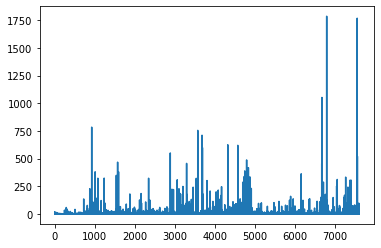

,term,occurrences,frequency
6799,to,1785,0.027950
7562,you,1767,0.027668
6681,the,1052,0.016472
923,and,784,0.012276
3575,in,755,0.011822


In [5]:

word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':data_train_count.toarray().sum(axis=0)})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
plt.plot(word_freq_df.occurrences)
plt.show() # 显示图形


word_freq_df_sort = word_freq_df.sort_values(by=['occurrences'], ascending=False)
word_freq_df_sort.head()



In [6]:
# 查看发现train 和 test 的feature不一致

print (data_train_count.shape, labels_train.shape, data_test_count.shape)

(4457, 7612) (4457,) (1115, 7612)


选择比较重要的feature

训练模型

In [7]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [8]:
# 检测模型

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


print (accuracy_score(labels_test, predictions))
print (classification_report(labels_test, predictions))
print (confusion_matrix(labels_test, predictions))


cross_val = cross_val_score(clf, data_train_count, labels_train, cv=20, scoring='accuracy')
print (cross_val)
print (np.mean(cross_val))

0.9874439461883409
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[947   2]
 [ 12 154]]
[0.99553571 0.97309417 0.96860987 0.97757848 0.97757848 0.98654709
 0.99103139 0.99103139 0.98206278 0.98654709 0.98206278 0.98654709
 0.98206278 0.98206278 0.97309417 0.99103139 0.96846847 0.97747748
 0.99099099 0.98648649]
0.9824950420872508
